In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
import seaborn as sns
from sklearn.metrics import accuracy_score
from keras.optimizers import Adam


import tensorflow as tf
from keras.datasets import cifar10
import warnings
warnings.filterwarnings('ignore')

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
cifar_classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
num_classes=y_train[0].shape[0]

In [ ]:
BATCH_SIZE = 50
EPOCHS = 30
IMG_SHAPE  = 32 

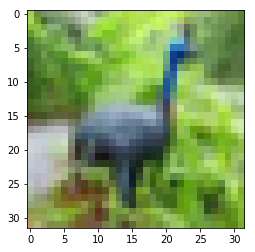

In [20]:
plt.imshow(x_train[6])

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

opt = Adam(lr = 0.0001)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [24]:
x_train.shape[0]

50000

In [25]:
history = model.fit(
    x_train,
    y_train_cat,
    epochs=20,
    batch_size = BATCH_SIZE
)

Epoch 1/20
50000/50000 [==============================] - 16s 313us/step - loss: 4.4899 - acc: 0.2405
Epoch 2/20
50000/50000 [==============================] - 15s 300us/step - loss: 1.6232 - acc: 0.4039
Epoch 3/20
50000/50000 [==============================] - 15s 298us/step - loss: 1.4627 - acc: 0.4684
Epoch 4/20
50000/50000 [==============================] - 15s 299us/step - loss: 1.3498 - acc: 0.5142
Epoch 5/20
50000/50000 [==============================] - 15s 299us/step - loss: 1.2658 - acc: 0.5479
Epoch 6/20
50000/50000 [==============================] - 15s 297us/step - loss: 1.1938 - acc: 0.5750
Epoch 7/20
50000/50000 [==============================] - 15s 298us/step - loss: 1.1350 - acc: 0.6010
Epoch 8/20
50000/50000 [==============================] - 15s 298us/step - loss: 1.0761 - acc: 0.6205
Epoch 9/20
50000/50000 [==============================] - 15s 298us/step - loss: 1.0214 - acc: 0.6405
Epoch 10/20
50000/50000 [==============================] - 15s 298us/step - loss: 

In [0]:
test = x_test[200].reshape(1, 32, 32, 3)

In [27]:
model.model.predict_classes(test)

array([5])

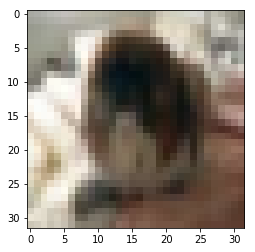

In [28]:
plt.imshow(x_test[200])
plt.show()

In [47]:
y_pred = model.predict_classes(x_test)
print('Accuracy on the training set is : {}'.format(accuracy_score(y_pred, y_test)))

Accuracy on the training set is : 0.7549


In [0]:
def test_function(x):
  img = x
  test = x.reshape(1,32,32,3)
  test = model.predict_classes(test)
  if test == 0:
    print('It is a airplane')
  elif test == 1:
    print('It is a automobile')
  elif test == 2:
    print('It is a bird')
  elif test == 3:
    print('It is a cat')
  elif test == 4:
    print('It is a deer')
  elif test == 5:
    print('It is a dog')
  elif test == 6:
    print('It is a frog')
  elif test == 7:
    print('It is a horse')
  elif test == 8:
    print('It is a ship')
  elif test == 9:
    print('It is a truck')
    
  plt.imshow(img)
  plt.show()

It is a dog


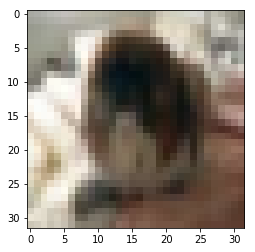

In [34]:
test_function(x_test[200])